In [7]:
import pandas as pd
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

from sklearn.decomposition import PCA

In [9]:
df = pd.read_csv('../../coastal_upwelling_output/interpolated.csv')
df.rename({'Unnamed: 0':'time'},inplace=True, axis=1)
df.set_index('time', inplace=True)
df.drop(columns=['CUTI', 'upwelling'], inplace=True)

In [10]:
df

,10,16,22,28,34,40,46,52,58,64,...,142,148,154,160,166,172,178,184,190,196
time,,,,,,,,,,,,,,,,,,,,,
2018-07-17 17:02:10.061576192,14.050275,11.959311,10.073221,9.767676,9.482159,9.105380,9.056556,9.055258,9.038180,8.987498,...,7.619771,7.586346,7.528777,7.338059,7.275881,7.237259,7.168897,7.087552,7.032359,6.999018
2018-07-17 18:25:30.061576192,13.957127,10.870573,9.901940,9.695652,9.342295,9.117574,9.069495,9.021141,9.080058,9.081508,...,7.794354,7.704981,7.655243,7.505627,7.412475,7.401960,7.334573,7.211357,7.136497,7.066432
2018-07-17 19:48:50.061576192,14.042208,10.949701,9.850174,9.776190,9.300516,9.257225,9.193214,9.130008,9.150563,9.106404,...,7.836112,7.726186,7.664953,7.591927,7.506104,7.450694,7.371207,7.261236,7.173726,7.114324
2018-07-17 21:12:10.061576192,14.140387,11.095460,9.932039,9.728931,9.258736,9.346245,9.331689,9.174076,9.217667,9.102127,...,7.801404,7.722635,7.672826,7.621918,7.514516,7.366019,7.300821,7.201451,7.165526,7.150486
2018-07-17 22:35:30.061576192,14.116346,11.205226,9.967389,9.708485,9.617728,9.247863,9.456468,9.246932,9.266785,9.216697,...,7.825550,7.761461,7.710273,7.659872,7.586809,7.503011,7.421469,7.306080,7.253350,7.191860
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-12-25 19:42:10.061576192,11.958360,11.958135,11.958165,11.952446,11.940669,11.822778,11.618385,11.532611,11.528637,11.527489,...,9.162451,9.118422,9.168857,9.034012,8.862957,8.840823,8.886654,8.814835,8.724564,8.534272
2018-12-25 21:05:30.061576192,11.966183,11.966942,11.967257,11.958619,11.929104,11.848490,11.649076,11.534315,11.527931,11.524362,...,9.322393,9.224035,9.089054,9.022601,8.882834,8.855709,8.847703,8.814844,8.684697,8.536650
2018-12-25 22:28:50.061576192,11.974130,11.973730,11.974008,11.968621,11.933196,11.913816,11.740736,11.675417,11.565127,11.539638,...,9.320347,9.267709,9.166364,9.116368,9.001082,8.974241,8.897539,8.833432,8.750648,8.539029


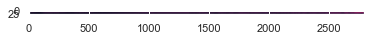

In [28]:
fig, ax = plt.subplots()
ax.imshow(df.T)

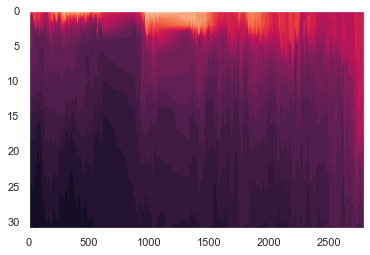

In [31]:
fig, ax = plt.subplots()

ax.contourf(df.T, levels=30)
ax.invert_yaxis()

Text(0, 0.5, 'Cumulative explained variance')

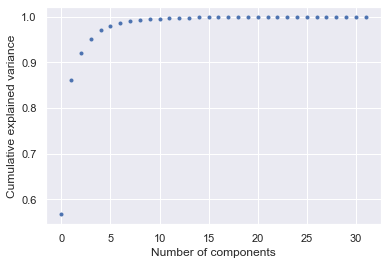

In [41]:
pca = PCA().fit(df)
plt.plot(np.cumsum(pca.explained_variance_ratio_), '.')
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')

The first 2 components explain over 80% of the variance - I'll include 4 for now because that explains 95% of the variance, but in general how do you choose the number of components to use? 

In [57]:
pca = PCA(n_components=4).fit(df)
pca.n_components_

4

In [58]:
pca.explained_variance_

array([8.9311908 , 4.64471182, 0.90308301, 0.50069181])

In [59]:
components = pca.transform(df)

In [60]:
filtered = pca.inverse_transform(components)

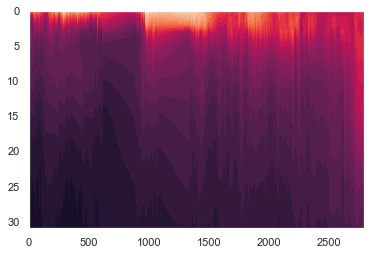

In [61]:
fig, ax = plt.subplots()

ax.contourf(filtered.T, levels=30)
ax.invert_yaxis()

In [15]:
pca = PCA(n_components=1)
pca.fit(df)

PCA(n_components=2)

In [16]:
print(pca.components_)

[[ 0.04637957  0.24861474  0.3216514   0.29107414  0.28034191  0.24841423
   0.2199429   0.197964    0.18300353  0.17284187  0.16514643  0.16415328
   0.16413521  0.16423486  0.1600489   0.16087171  0.16286128  0.16079666
   0.15623374  0.15198853  0.14926475  0.14589691  0.14111217  0.13843448
   0.13354229  0.13009286  0.12554702  0.12231655  0.11938222  0.11463996
   0.11068681  0.09663537]
 [-0.64741305 -0.53475429 -0.36770273 -0.07172859  0.00865234  0.05106137
   0.05972456  0.05251244  0.04207918  0.04026739  0.05077366  0.05474031
   0.0646815   0.07160826  0.09321952  0.09249109  0.08790707  0.08418165
   0.08607585  0.08764898  0.08663723  0.08546844  0.08231553  0.07790033
   0.07869133  0.07989091  0.08052666  0.08025784  0.07852848  0.08024839
   0.07918381  0.08986975]]


In [17]:
print(pca.explained_variance_)

[8.9311908  4.64471182]
